In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np

In [5]:
features = pd.read_csv(r'../features/features.csv')
ground_truth = pd.read_csv(r"../data/example_ground_truth.csv")


In [6]:
ground_truth['image_id']

0      ISIC_0001769
1      ISIC_0001852
2      ISIC_0001871
3      ISIC_0003462
4      ISIC_0003539
           ...     
145    ISIC_0015443
146    ISIC_0015445
147    ISIC_0015483
148    ISIC_0015496
149    ISIC_0015627
Name: image_id, Length: 150, dtype: object

In [7]:
mask = ground_truth['melanoma'] == 1

In [8]:
melanoma_mask = ground_truth[mask]
len(melanoma_mask)

30

In [ ]:
total_data = []
melanoma_data = []
x = 0

for image_id in ground_truth['image_id']:
    print(image_id,x)
    image = plt.imread('../data/example_image/'+image_id+'.jpg')
    image_seg = plt.imread('../data/example_segmentation/'+image_id+'_segmentation.png')
     if image_id in list(melanoma_mask['image_id']):
        melanoma_data.append((image_id,image,image_seg))
    total_data.append((image_id,image,image_seg))
    x += 1

ISIC_0001769 0
ISIC_0001852 1
ISIC_0001871 2
ISIC_0003462 3
ISIC_0003539 4
ISIC_0003582 5
ISIC_0003657 6
ISIC_0003805 7
ISIC_0004337 8
ISIC_0006651 9
ISIC_0006671 10
ISIC_0006815 11
ISIC_0006914 12
ISIC_0007141 13
ISIC_0007156 14
ISIC_0007235 15
ISIC_0007241 16
ISIC_0007332 17
ISIC_0007344 18
ISIC_0007528 19
ISIC_0007796 20
ISIC_0008025 21
ISIC_0008524 22
ISIC_0009995 23
ISIC_0010459 24
ISIC_0012099 25
ISIC_0012109 26
ISIC_0012126 27
ISIC_0012127 28
ISIC_0012143 29
ISIC_0012151 30
ISIC_0012159 31
ISIC_0012160 32
ISIC_0012191 33
ISIC_0012201 34
ISIC_0012204 35
ISIC_0012206 36
ISIC_0012210 37
ISIC_0012221 38
ISIC_0012222 39
ISIC_0012254 40
ISIC_0012256 41
ISIC_0012288 42
ISIC_0012306 43
ISIC_0012313 44
ISIC_0012316 45
ISIC_0012335 46
ISIC_0012380 47
ISIC_0012383 48
ISIC_0012400 49
ISIC_0012417 50
ISIC_0012434 51
ISIC_0012492 52
ISIC_0012513 53
ISIC_0012538 54
ISIC_0012547 55
ISIC_0012660 56
ISIC_0012684 57
ISIC_0012720 58
ISIC_0012746 59
ISIC_0012876 60
ISIC_0012927 61
ISIC_0012956 62
IS

In [ ]:
total_data

In [23]:
len(melanoma_data)

NameError: name 'melanoma_data' is not defined

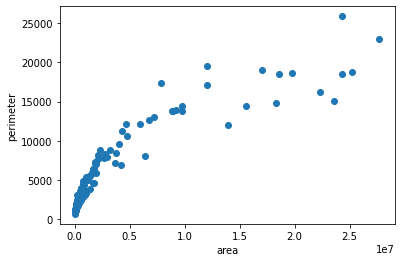

In [22]:
plt.scatter(features['area'],features['perimeter'])
plt.xlabel('area')
plt.ylabel('perimeter');

In [21]:
melanoma_data[0][2]

NameError: name 'melanoma_data' is not defined

In [ ]:
plt.imshow(melanoma_data[0][2])

In [ ]:
melanoma_data[0][2]

In [24]:
def calculate_area(image):
    return np.sum(image)
#calculate_area(melanoma_data[0][2])

In [ ]:
from skimage import morphology

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(4)

mask_eroded = morphology.binary_erosion(melanoma_data[0][2], struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(melanoma_data[0][2][500:1200,1000:2000], cmap='gray')
#axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify it's smaller
#print(area)
print(calculate_area(melanoma_data[0][2])-np.sum(mask_eroded))
border = melanoma_data[0][2]-mask_eroded
plt.imshow(border[500:1200,1000:2000])


In [ ]:
def calculate_border(image,thickness):
    struct_el = morphology.disk(thickness)
    mask_eroded = morphology.binary_erosion(image, struct_el)
    return calculate_area(image)-np.sum(mask_eroded)
calculate_border(melanoma_data[0][2],4)

In [ ]:
plt.imshow(melanoma_data[0][1])

In [97]:
image = plt.imread('../data/example_image/ISIC_0012191.jpg')
image_mask = plt.imread('../data/example_segmentation/ISIC_0012191_segmentation.png')
# plt.imshow(image)
# plt.imshow(image_mask)

def average_colour(image,segmentation):
    mask = segmentation == 1
    copy = image.copy()
    r = np.mean(copy[mask,0])
    g = np.mean(copy[mask,1])
    b = np.mean(copy[mask,2])
    #num_of_pixels = copy[mask].shape[0]
    return [r,g,b]

average_colour(image,image_mask)

[107.59532022042703, 60.2504712780337, 39.208619076249846]

In [98]:
def deviation_of_colour(image,segmentation):
    mask = segmentation == 1
    copy = image.copy()
    r = np.std(copy[mask,0])
    g = np.std(copy[mask,1])
    b = np.std(copy[mask,2])
    return [r,g,b]
deviation_of_colour(image,image_mask)

[31.229613737679642, 26.90004496435365, 20.309038404175457]

In [100]:
def average_luminosity(image,segmentation):
    avg_colour = average_colour(image,segmentation)
    return 0.299*avg_colour[0] + 0.587*avg_colour[1] + 0.114*avg_colour[2]

average_luminosity(image,image_mask)

72.00780996080594

In [140]:
def deviation_luminosity(image,segmentation):
    deviation_colour = deviation_of_colour(image,segmentation)
    return np.sqrt(0.299**2*deviation_colour[0]**2 + 0.587**2*deviation_colour[1]**2 + 0.114**2*deviation_colour[2]**2)

deviation_luminosity(image,image_mask)


18.490172823358844

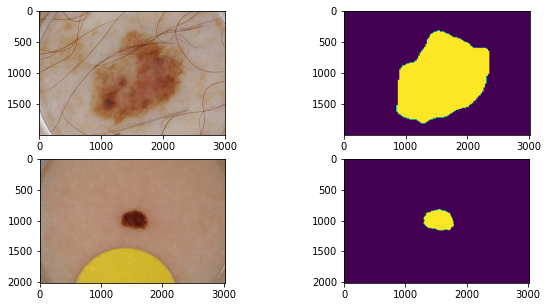

In [124]:
test = plt.imread('../data/example_image/ISIC_0012151.jpg')
testmask = plt.imread('../data/example_segmentation/ISIC_0012151_segmentation.png')

test2 = plt.imread('../data/example_image/ISIC_0001852.jpg')
test2mask = plt.imread('../data/example_segmentation/ISIC_0001852_segmentation.png')


f, axes = plt.subplots(2,2,figsize=(10,5))
axes[0][0].imshow(test)
axes[0][1].imshow(testmask)
axes[1][0].imshow(test2)
axes[1][1].imshow(test2mask)

In [141]:
#average_colour
#deviation_colour
#average_luminosity
#deviation_luminosity
print("Avg colour")
print(average_colour(test,testmask))
print(average_colour(test2,test2mask))
print("Avg Luminosity")
print(average_luminosity(test,testmask))
print(average_luminosity(test2,test2mask))
print("Deviation of colour")
print(deviation_of_colour(test,testmask))
print(deviation_of_colour(test2,test2mask))
print("Deviation of luminosity")
print(deviation_luminosity(test,testmask))
print(deviation_luminosity(test2,test2mask))


Avg colour
[154.00267150956654, 101.85409630397325, 69.64278522359373]
[116.74907466300874, 54.64894668679546, 33.08742231384059]
Avg Luminosity
113.77443082728237
70.75887117316637
Deviation of colour
[12.488177086059158, 22.763660597504117, 21.369407301748925]
[31.27789052350099, 32.07510414646571, 25.099897073574354]
Deviation of luminosity
14.086424838226527
21.21664308811602
